# Titanic - Machine Learning from Disaster

As a first introduction to machine learning we shall explore the Titanic dataset obtained from [Kaggle](https://www.kaggle.com/c/titanic). Per the description on Kaggle, we hope to "use machine learning to create a model that predicts which passengers survived the Titanic shipwreck". This dataset provides a variety of features including name, age, port of embarkation, and many others so let's jump right in!

## Imports

We first import the standard libraries.

In [470]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # preferred seaborn aesthetic
%matplotlib inline

Next we read in the training and test sets which are conveniently provided by Kaggle. The data provided contains a **PassengerId** column. It seems reasonable to utilize this as our index.

In [471]:
train=pd.read_csv('train.csv',index_col='PassengerId')
test=pd.read_csv('test.csv',index_col='PassengerId')

We combine these two sets to allow for simultaneous feature engineering. Note however that we will ensure that whatever feature engineering we perform is solely inspired by data from the training set.

In [472]:
df=pd.concat([train,test])

## EDA

Let's look at the features we have in our dataset.

In [473]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [474]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [475]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Our target is the **Survived** column. Let's briefly describe what each of the features represent.

**Pclass** - the passenger's ticket class: either first, second, or third

**Name** - the passenger's name in the format (Last name), (Title) (First name) (Middle name)

**Sex** - the passenger's sex

**Age** - the passenger's age

**SibSp** - the number of siblings and spouses the passenger has aboard the Titanic

**Parch** - the number of parents and children the passenger has aboard the Titanic

**Ticket** - the passenger's ticket number

**Fare** - the passenger's fare

**Cabin** - the passenger's cabin number

**Embarked** - the passenger's port of embarkation: possible values are C, Q, and S which stand for Cherbourg, Queenstown, and Southampton, respectively

Let's look at our target.

<AxesSubplot:xlabel='Survived', ylabel='count'>

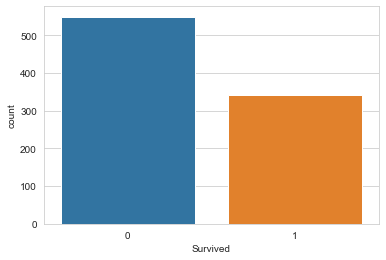

In [476]:
sns.countplot(data=train,x='Survived')

Fortunately for us it seems that the two target classes are fairly evenly distributed. Now let's see how our target ineracts with our numerical features.

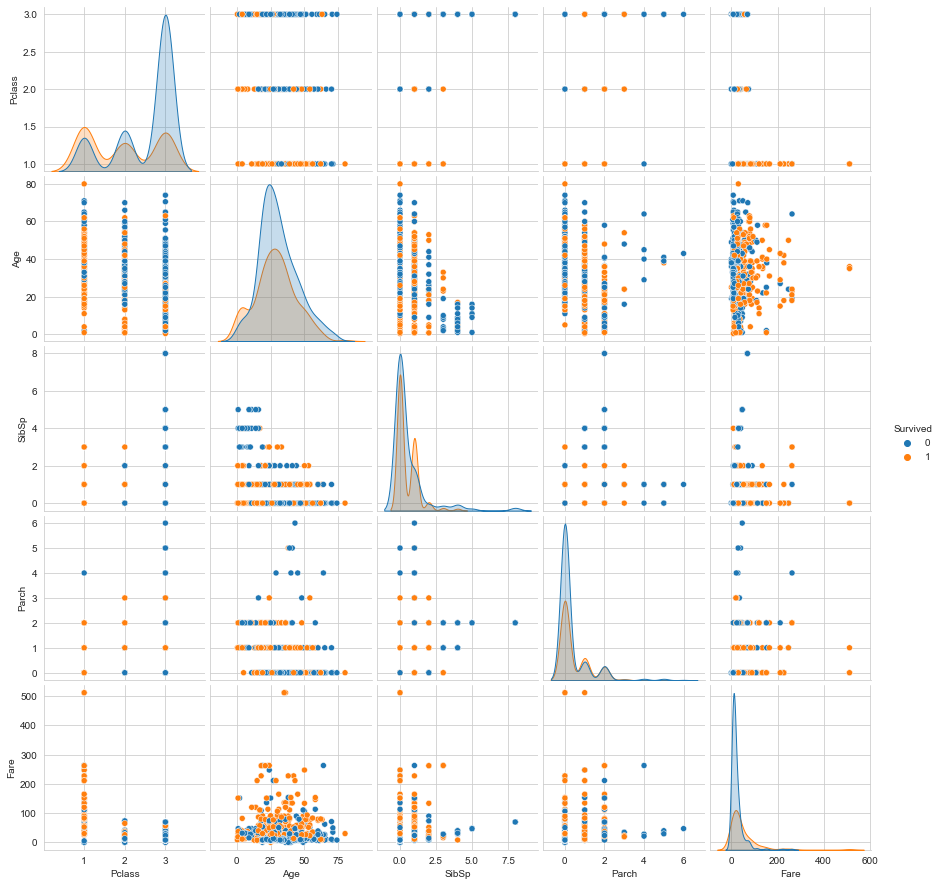

In [477]:
sns.pairplot(data=train,hue='Survived')

**Pclass** seems to be an important feature to consider. **Age** does not appear to be a significant factor, but there is a slight bump indicating that passengers below a certain age had a decent chance of survival. **SibSp** may have a similar bump. On the other hand, **Parch** does not seem to play a huge role in determining survival. It is difficult to tell from this plot alone the importance of **Fare**.

Now let's take a look at the correlations in our dataset.

<AxesSubplot:>

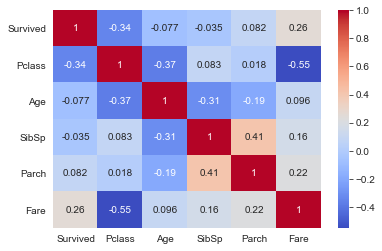

In [478]:
sns.heatmap(data=train.corr(),annot=True,cmap='coolwarm')

<AxesSubplot:>

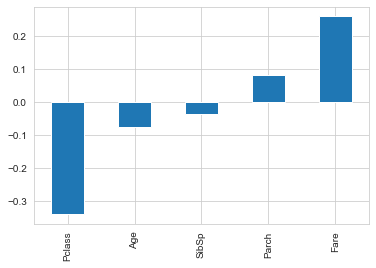

In [479]:
train.corr()['Survived'].drop('Survived').sort_values().plot(kind='bar')

As anticipated, **Pclass** correlates with survival. **Fare** as well, which was difficult to ascertain from the previous plot. Correlations between survival and **Age**, **SibSp**, and **Parch** are all rather weak.

Let's take a closer look at each of our features, starting with **Pclass**.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

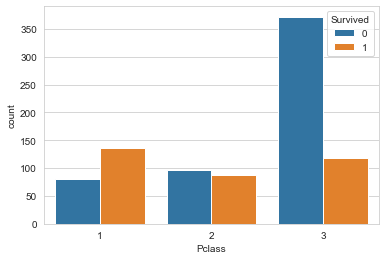

In [480]:
sns.countplot(data=train,x='Pclass',hue='Survived')

We can certainly see a trend here: lower class passengers had a lower chance of survival.

What role did **Sex** play?

<AxesSubplot:xlabel='Sex', ylabel='count'>

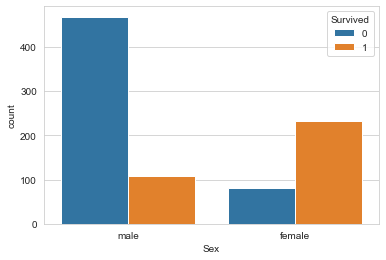

In [481]:
sns.countplot(data=train,x='Sex',hue='Survived')

There is a substantial difference between the two sexes when it comes to survival.

Let's take a look at **Age** next.

<AxesSubplot:xlabel='Age', ylabel='Count'>

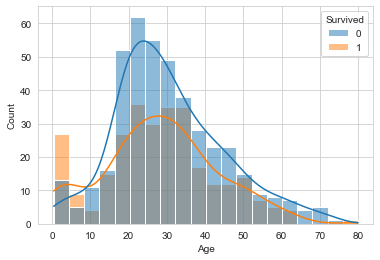

In [482]:
sns.histplot(data=train,x='Age',hue='Survived',kde=True)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

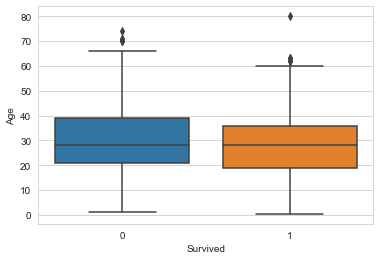

In [483]:
sns.boxplot(data=train,x='Survived',y='Age')

Based off the plots above, **Age** does not seem to be a significant indicator of survival. However, the histogram illustrates that very young passengers had a relatively high chance of survival. Combined with the **Sex** plot above it seems like the adage "women and children first" is quite accurate here.

Let's examine **SibSp** next.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

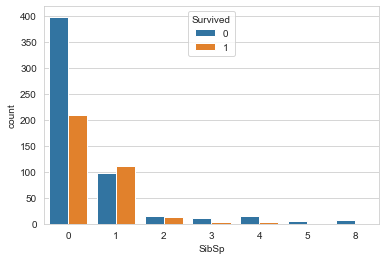

In [484]:
sns.countplot(data=train,x='SibSp',hue='Survived')

There is not much of a general trend here. Curiously, passengers with **SibSp** values of 1 or 2 generally fare better.

Next up is **Parch**.

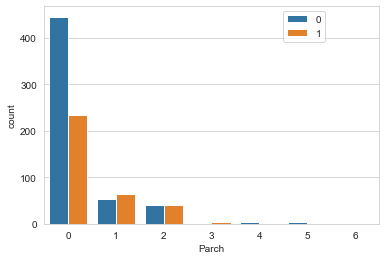

In [485]:
sns.countplot(data=train,x='Parch',hue='Survived')
plt.legend(bbox_to_anchor=(0.7,1))

**Parch** exhibits behaviour similar to **SibSp** in that passengers with **Parch** values of 1 or 2 were more likely to survive than their fellow passengers.

We take a look at **Fare** next.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

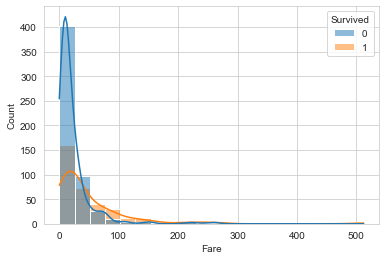

In [486]:
sns.histplot(data=train,x='Fare',hue='Survived',kde=True,bins=20)

**Fare** is heavily skewed to the right. Perhaps it would benefit from a log1p transformation.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

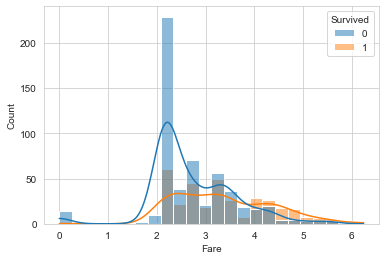

In [487]:
sns.histplot(data=train,x=train['Fare'].apply(np.log1p),hue='Survived',kde=True)

In [488]:
from scipy import stats

In [489]:
print('Skewness of original fare:',stats.skew(train['Fare'].dropna()))
print('Skewness of transformed fare:',stats.skew(train['Fare'].dropna().apply(np.log1p)))

Skewness of original fare: 4.7792532923723545
Skewness of transformed fare: 0.39426283638993376


The data after the transformation is far less skewed. Let's go ahead and replace **Fare** with the log-transformed fare data.

In [490]:
df['LogFare']=df['Fare'].apply(np.log1p)
df.drop('Fare',axis=1,inplace=True)

Lastly we take a closer look at **Embarked**.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

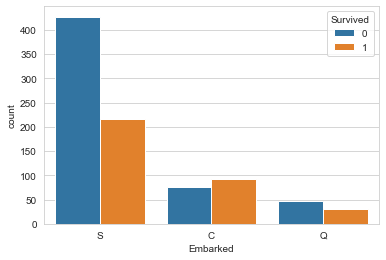

In [491]:
sns.countplot(data=train,x='Embarked',hue='Survived')

Passengers who embarked from Cherbourg had a better chance of surviving compared to those who embarked from Southampton or Queenstown.

## Feature Engineering

Before we engineer some features, let's get a sense of the amount data we are missing per feature.

In [492]:
100*df.drop('Survived',axis=1).isna().sum()/len(df) # returns the percentage of data missing for each feature

Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         20.091673
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Cabin       77.463713
Embarked     0.152788
LogFare      0.076394
dtype: float64

**Age** and **Cabin** are missing a substantial amount of information. We will deal with those two features later.

### Sex

For now let's one-hot encode **Sex**.

In [493]:
df=pd.get_dummies(data=df,columns=['Sex'],drop_first=True)

### Embarked

We would like to one-hot encode **Embarked** as well but it seems to be missing some values. Let's take a look at the the passengers with missing **Embarked** entries.

In [494]:
df[df['Embarked'].isna()]

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Cabin,Embarked,LogFare,Sex_male
PassengerId,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",38.0,0,0,113572,B28,NaN,4.394449,0
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",62.0,0,0,113572,B28,NaN,4.394449,0


These two passengers shared a ticket and cabin and so they most likely embarked from the same port. Let's try to estimate from which port they embarked.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

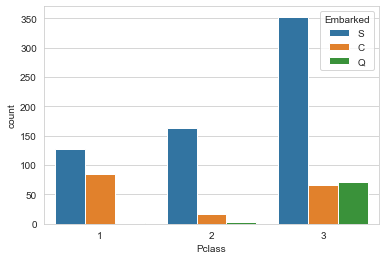

In [495]:
sns.countplot(data=train,x='Pclass',hue='Embarked')

<AxesSubplot:xlabel='Sex', ylabel='count'>

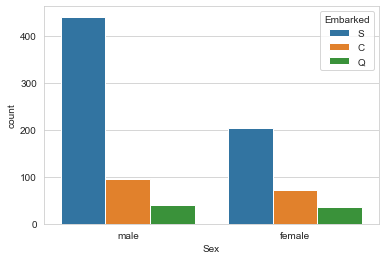

In [496]:
sns.countplot(data=train,x='Sex',hue='Embarked')

Based off the above plots and the fact that these passengers were first class female passengers we will go ahead and impute the missing **Embarked** values as S.

In [497]:
df.loc[df['Embarked'].isna(),'Embarked']='S'

Now we can one-hot encode **Embarked**.

In [498]:
df=pd.get_dummies(data=df,columns=['Embarked'])

### Name

Let's feature engineer something useful from **Name**.

In [499]:
train['Name'].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

**Name** contains titles for the passengers. Let's extract this information as a new feature.

In [500]:
import re
df['Title']=df['Name'].apply(lambda x:re.findall('\w+,\s([^\.]+)\.',x)[0])

How many titles are there?

In [501]:
df['Title'].nunique()

18

In [502]:
df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Jonkheer          1
the Countess      1
Mme               1
Capt              1
Sir               1
Don               1
Dona              1
Lady              1
Name: Title, dtype: int64

Mr, Miss, Mrs, and Master occur frequently enough to warrant keeping. Let's try to convert the other titles into one of these four.

Firstly, we can replace both Ms and Mlle with Miss. Similarly we can replace Mme with Mrs.

In [503]:
df['Title'].replace(('Ms','Mlle'),'Miss',inplace=True)
df['Title'].replace('Mme','Mrs',inplace=True)

How about the remaining miscellaneous titles? First note that any male passenger is going to be retitled as either Mr or Master. What is the difference between these two titles?

In [504]:
df[(df['Survived'].isna()==False) & (df['Title']=='Mr')].describe()

,Survived,Pclass,Age,SibSp,Parch,LogFare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,517.000000,517.000000,398.000000,517.000000,517.000000,517.000000,517.0,517.000000,517.000000,517.000000
mean,0.156673,2.410058,32.368090,0.288201,0.152805,2.709943,1.0,0.164410,0.067698,0.767892
std,0.363844,0.810622,12.708793,0.821298,0.533615,0.925754,0.0,0.371006,0.251471,0.422587
min,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,0.000000,2.000000,23.000000,0.000000,0.000000,2.174752,1.0,0.000000,0.000000,1.000000
50%,0.000000,3.000000,30.000000,0.000000,0.000000,2.336987,1.0,0.000000,0.000000,1.000000
75%,0.000000,3.000000,39.000000,0.000000,0.000000,3.295837,1.0,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,5.000000,6.240917,1.0,1.000000,1.000000,1.000000


In [505]:
df[(df['Survived'].isna()==False) & (df['Title']=='Master')].describe()

,Survived,Pclass,Age,SibSp,Parch,LogFare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,40.000000,40.000000,36.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.000000,40.000000
mean,0.575000,2.625000,4.574167,2.300000,1.375000,3.381361,1.0,0.125000,0.100000,0.775000
std,0.500641,0.627878,3.619872,1.910833,0.540062,0.590817,0.0,0.334932,0.303822,0.422902
min,0.000000,1.000000,0.420000,0.000000,0.000000,2.253048,1.0,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,1.000000,1.000000,2.983153,1.0,0.000000,0.000000,1.000000
50%,1.000000,3.000000,3.500000,1.000000,1.000000,3.403276,1.0,0.000000,0.000000,1.000000
75%,1.000000,3.000000,8.000000,4.000000,2.000000,3.693140,1.0,0.000000,0.000000,1.000000
max,1.000000,3.000000,12.000000,8.000000,2.000000,5.027492,1.0,1.000000,1.000000,1.000000


Notice that everyone titled Master is a male aged 12 or under. We can use this to retitle any male passenger not already titled Mr or Master.

In [506]:
titles=['Mr','Miss','Mrs','Master']
df[(df['Sex_male']==1) & (~df['Title'].isin(titles))]['Age'].min()

23.0

The minimum age of the male passengers not titled Mr or Master is 23. Consequently it is reasonable to retitle them all as Mr.

In [507]:
df.loc[((df['Sex_male']==1) & (~df['Title'].isin(titles))),'Title']='Mr'

How about the remaining titles?

In [508]:
df[(df['Sex_male']==0) & (~df['Title'].isin(titles))]

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Cabin,LogFare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title
PassengerId,,,,,,,,,,,,,,
557,1.0,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",48.0,1,0,11755,A16,3.703768,0,1,0,0,Lady
760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",33.0,0,0,110152,B77,4.471639,0,0,0,1,the Countess
797,1.0,1,"Leader, Dr. Alice (Farnham)",49.0,0,0,17465,D17,3.293211,0,0,0,1,Dr
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,C105,4.699571,0,1,0,0,Dona


In [509]:
df[(df['Survived'].isna()==False) & (df['Title']=='Mrs')].describe()

,Survived,Pclass,Age,SibSp,Parch,LogFare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,126.000000,126.000000,109.000000,126.000000,126.000000,126.000000,126.0,126.000000,126.000000,126.000000
mean,0.793651,1.992063,35.788991,0.690476,0.825397,3.481821,0.0,0.253968,0.023810,0.722222
std,0.406300,0.824583,11.437490,0.599524,1.271719,0.808272,0.0,0.437017,0.153064,0.449691
min,0.000000,1.000000,14.000000,0.000000,0.000000,2.107178,0.0,0.000000,0.000000,0.000000
25%,1.000000,1.000000,27.000000,0.000000,0.000000,2.826566,0.0,0.000000,0.000000,0.000000
50%,1.000000,2.000000,35.000000,1.000000,0.000000,3.295837,0.0,0.000000,0.000000,1.000000
75%,1.000000,3.000000,44.000000,1.000000,1.000000,4.072999,0.0,0.750000,0.000000,1.000000
max,1.000000,3.000000,63.000000,3.000000,6.000000,5.515527,0.0,1.000000,1.000000,1.000000


In [510]:
df[(df['Survived'].isna()==False) & (df['Title']=='Miss')].describe()

,Survived,Pclass,Age,SibSp,Parch,LogFare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,185.000000,185.000000,149.000000,185.000000,185.000000,185.000000,185.0,185.000000,185.000000,185.000000
mean,0.702703,2.291892,21.845638,0.702703,0.540541,3.181088,0.0,0.216216,0.178378,0.605405
std,0.458309,0.854139,12.870542,1.423118,0.800631,1.020353,0.0,0.412781,0.383870,0.490090
min,0.000000,1.000000,0.750000,0.000000,0.000000,2.047693,0.0,0.000000,0.000000,0.000000
25%,0.000000,1.000000,14.500000,0.000000,0.000000,2.200464,0.0,0.000000,0.000000,0.000000
50%,1.000000,3.000000,21.000000,0.000000,0.000000,2.817903,0.0,0.000000,0.000000,1.000000
75%,1.000000,3.000000,30.000000,1.000000,1.000000,3.869116,0.0,0.000000,0.000000,1.000000
max,1.000000,3.000000,63.000000,8.000000,2.000000,6.240917,0.0,1.000000,1.000000,1.000000


There is no clear difference between Mrs and Miss like there was between Mr and Master. One thing we might be able to use is **SibSp**. Those titled Mrs may be travelling with their husbands and thus have a **SibSp** value of at least one. Let's see if this is a reasonable assumption.

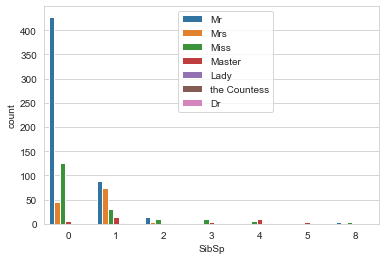

In [511]:
sns.countplot(data=df[df['Survived'].isna()==False],x='SibSp',hue='Title')
plt.legend(bbox_to_anchor=(0.7,1))

Our assumption does appear reasonable. Thus we replace the Countess, Dr, and Dona with Miss and Lady with Mrs.

In [512]:
df['Title'].replace(('the Countess','Dr','Dona'),'Miss',inplace=True)
df['Title'].replace('Lady','Mrs',inplace=True)

How useful is this **Title** feature?

<AxesSubplot:xlabel='Title', ylabel='count'>

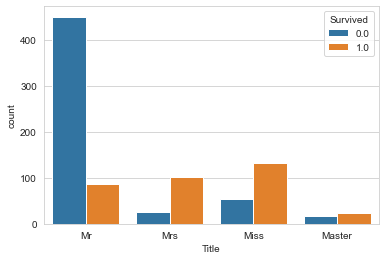

In [513]:
sns.countplot(data=df,x='Title',hue='Survived')

It does not look like **Title** adds all that much. We already knew that women and children had higher odds of survival compared to men and **Title** simply reinforces that fact. Nonetheless we shall keep this feature as it may prove useful. Let's one-hot encode it.

In [514]:
df=pd.get_dummies(data=df,columns=['Title'])

Let's drop **Name** now.

In [515]:
df.drop('Name',axis=1,inplace=True)

### SibSp and Parch

While there is not much feature engineering we can do with SibSp and Parch it might be useful to know how many family members a passenger had aboard the Titanic. This would simply be the sum of **SibSp** and **Parch**.

In [516]:
df['Fam']=df['SibSp']+df['Parch']

Is **Fam** useful?

<AxesSubplot:xlabel='Fam', ylabel='count'>

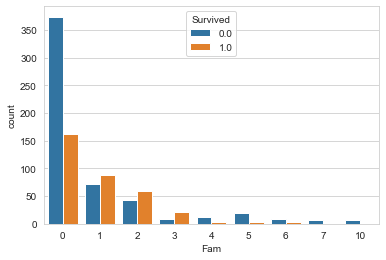

In [517]:
sns.countplot(data=df,x='Fam',hue='Survived')

In [518]:
df[['Survived','Fam']].corr()

,Survived,Fam
Survived,1.000000,0.016639
Fam,0.016639,1.000000


Rather than know how many family members were aboard the Titanic it might be more useful to know whether a passenger travelled without any family.

In [519]:
df['NoFam']=1*(df['Fam']==0)

Is **NoFam** more useful than **Fam**?

<AxesSubplot:xlabel='NoFam', ylabel='count'>

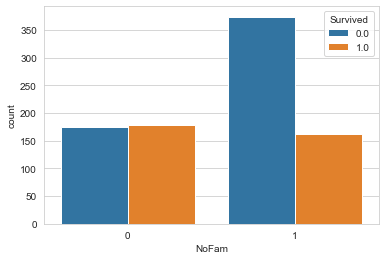

In [520]:
sns.countplot(data=df,x='NoFam',hue='Survived')

In [521]:
df[['Survived','NoFam']].corr()

,Survived,NoFam
Survived,1.000000,-0.203367
NoFam,-0.203367,1.000000


It certainly seems that **NoFam** is a more helpful feature than **Fam**. Let's drop **Fam**.

In [522]:
df.drop('Fam',axis=1,inplace=True)

### Ticket

Let's see if there is any useful information in **Ticket**.

In [523]:
train['Ticket'].head()

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: object

In [524]:
train['Ticket'].nunique()

681

We have fewer tickets than passengers and so some tickets appear more than once. We might want to encode the number of times a tickt appears as a feature. However, this would be a form of data leakage as it requires information from the test set. As such we simply drop the Ticket feature.

In [525]:
df.drop('Ticket',axis=1,inplace=True)

### LogFare

Next up is **LogFare**. There is no required feature engineering here. We need only fill in the missing value.

In [526]:
df[df['LogFare'].isna()]

,Survived,Pclass,Age,SibSp,Parch,Cabin,LogFare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,NoFam
PassengerId,,,,,,,,,,,,,,,,
1044,NaN,3,60.5,0,0,NaN,NaN,1,0,0,1,0,0,1,0,1


This passenger was an elderly male travelling alone in third class who embarked from Southampton. Let's try to estimate his fare. First we determine what correlates well with **LogFare**.

<AxesSubplot:>

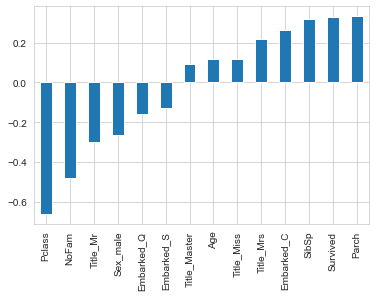

In [527]:
df[df['Survived'].isna()==False].corr()['LogFare'].drop('LogFare').sort_values().plot(kind='bar')

**Pclass** and **NoFam** seem to correlate best with **LogFare**.

<AxesSubplot:xlabel='LogFare', ylabel='Count'>

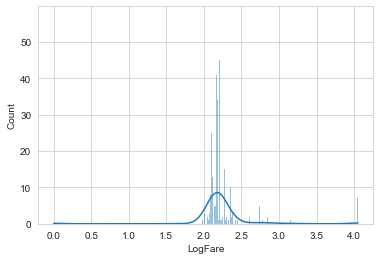

In [528]:
sns.histplot(data=df[(df['Survived'].isna()==False) & (df['Pclass']==3) & (df['NoFam']==1)],x='LogFare',kde=True)

It seems fairly reasonable to impute the missing **LogFare** value as the median value for a passenger in third class with no family aboard.

In [529]:
df.loc[df['LogFare'].isna(),'LogFare']=df[(df['Survived'].isna()==False) & (df['Pclass']==3) & (df['NoFam']==1)]['LogFare'].median()

### Cabin

Recall that **Cabin** was missing roughly 77% of its values. This percentage is far too large to impute the missing values. Instead, one feature which may prove useful is encoding whether a cabin number is unknown.

In [530]:
df['CabinUnknown']=1*(df['Cabin'].isna())

How useful is **CabinUnknown**?

<AxesSubplot:xlabel='CabinUnknown', ylabel='count'>

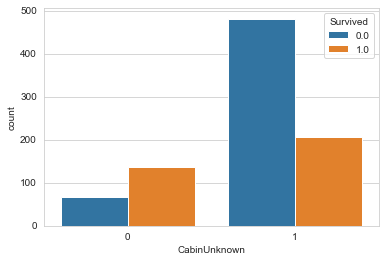

In [531]:
sns.countplot(data=df,x='CabinUnknown',hue='Survived')

It seems as though knowing whether the cabin number is unknown is actually quite useful. To see what else we may be able to glean from **Cabin** let's take a look at some values.

In [532]:
train['Cabin'].dropna().head()

PassengerId
2      C85
4     C123
7      E46
11      G6
12    C103
Name: Cabin, dtype: object

In [533]:
train['Cabin'].value_counts().head(20)

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
D              3
F2             3
F33            3
C22 C26        3
D26            2
E25            2
B5             2
B22            2
B28            2
E8             2
D20            2
C92            2
D35            2
C93            2
E33            2
C52            2
Name: Cabin, dtype: int64

It looks like **Cabin** values contains a code consisting of a letter-number pair (and in rare instances there is no number). Let's extract the cabin letter and see how useful of a feature that is.

In [534]:
def CabinLetter(cabin_name):
    if isinstance(cabin_name,str):
        return cabin_name[0]
    else:
        return 0 # return 0 for those without cabin names
df['CabinLetter']=df['Cabin'].apply(CabinLetter)
df['CabinLetter'].value_counts()

0    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: CabinLetter, dtype: int64

Let's investigate the usefulness of **CabinLetter**.

<AxesSubplot:xlabel='CabinLetter', ylabel='count'>

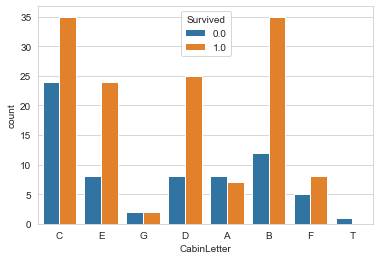

In [535]:
sns.countplot(data=df[df['CabinLetter']!=0],x='CabinLetter',hue='Survived')

The sample sizes for each cabin letter is too small to really be useful. Furthermore, without knowing what the cabin letters represent we cannot really do all that much with them. Let's drop **CabinLetter** and the original **Cabin** feature.

In [536]:
df.drop(['CabinLetter','Cabin'],axis=1,inplace=True)

### Age

The last feature we shall consider is **Age**. This feature is missing approximately 20% of its values. Let's try to impute the missing data. First let's establish what correlates with age.

<AxesSubplot:>

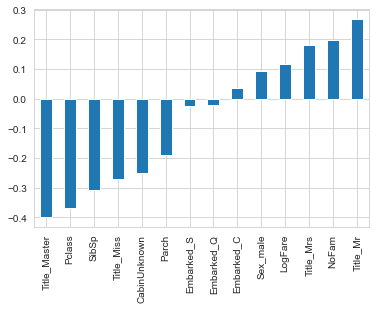

In [537]:
df[df['Survived'].isna()==False].corr()['Age'].drop(['Age','Survived']).sort_values().plot(kind='bar')

Let's use **Pclass**, **NoFam**, **CabinUnknown**, and the title features to try and impute the missing ages. When imputing a passenger's age we shall look at all passengers with the same **Pclass**, **NoFam**, and **CabinUnknown** values as well as the same title. We then impute their age randomly from a normal distribution with appropriate mean and standard deviation.

In [538]:
import itertools

In [539]:
# create a dataframe consisting of passengers with known ages
age_known=df[(df['Survived'].isna()==False) & (df['Age'].isna()==False)]

# initialize the dictionary that will contain the means and standard deviations
age_info=dict()

# fill in the dictionary
for pclass,nofam,cabin,title in itertools.product([1,2,3],[0,1],[0,1],['Mr','Mrs','Miss','Master']):
    curr_age_known=age_known[(age_known['Pclass']==pclass) & (age_known['NoFam']==nofam) & (age_known['CabinUnknown']==cabin) & (age_known['Title_'+title]==1)]['Age']
    age_info[(pclass,nofam,cabin,title)]=(curr_age_known.mean(),curr_age_known.std())

# create a function to impute the missing ages
def age_imputer(age,pclass,nofam,cabin,title):
    if np.isnan(age):
        key=age_info[(pclass,nofam,cabin,title)]
        return np.random.normal(loc=key[0],scale=key[1])
    else:
        return age
    
# create a function that returns a passengers title (needed for the previous function)
def titler(mr,mrs,miss,master):
    if mr==1:
        return 'Mr'
    elif mrs==1:
        return 'Mrs'
    elif miss==1:
        return 'Miss'
    else:
        return 'Master'

# impute the missing age values
df['Title']=df.apply(lambda x:titler(x['Title_Mr'],x['Title_Mrs'],x['Title_Miss'],x['Title_Master']),axis=1)
df['Age']=df.apply(lambda x:age_imputer(x['Age'],x['Pclass'],x['NoFam'],x['CabinUnknown'],x['Title']),axis=1)
df.drop('Title',axis=1,inplace=True)

Let's see if we have any missing ages after this.

In [540]:
df[df['Age'].isna()]

,Survived,Pclass,Age,SibSp,Parch,LogFare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,NoFam,CabinUnknown
PassengerId,,,,,,,,,,,,,,,,
257,1.0,1,NaN,0,0,4.384524,0,1,0,0,0,0,0,1,1,1
914,NaN,1,NaN,0,0,3.486864,0,0,0,1,0,0,0,1,1,1
1060,NaN,1,NaN,0,0,3.357622,0,1,0,0,0,0,0,1,1,1
1231,NaN,3,NaN,0,0,2.107689,1,1,0,0,1,0,0,0,1,1


We still have some missing ages. Why?

In [541]:
print(age_info[1,1,1,'Mrs'])
print(age_info[3,1,1,'Master'])

(nan, nan)
(nan, nan)


It seems like the missing ages are due to not having any passengers satisfying the required criteria. There are very few missing ages so lets simply impute just based on **Pclass** and title. Note that there are only two types of passengers with missing ages: first class passengers titled Mrs and a third class passenger titled Master.

In [542]:
# set up the relevant data
age_known_1_mrs=age_known[(age_known['Pclass']==1) & (age_known['Title_Mrs']==1)]['Age']
age_known_3_master=age_known[(age_known['Pclass']==3) & (age_known['Title_Master']==1)]['Age']

# impute the missing ages
df.loc[(df['Age'].isna()) & (df['Pclass']==1),'Age']=np.random.normal(loc=age_known_1_mrs.mean(),scale=age_known_1_mrs.std(),size=3)
df.loc[(df['Age'].isna()) & (df['Pclass']==3),'Age']=np.random.normal(loc=age_known_3_master.mean(),scale=age_known_3_master.std())

We no longer have missing age data.

In [543]:
df['Age'].isna().sum()

0

Let's see if what we imputed appears reasonable.

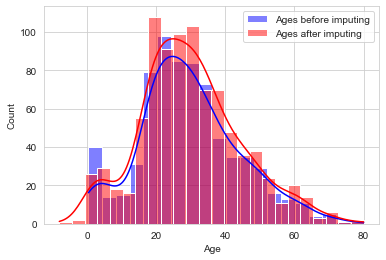

In [544]:
sns.histplot(data=train,x='Age',kde=True,color='blue',label='Ages before imputing')
sns.histplot(data=df[df['Survived'].isna()==False],x='Age',kde=True,color='red',label='Ages after imputing')
plt.legend()

It looks like our imputed values are fairly reasonable. Now recall that we previously noted a difference in behaviour for young ages pertaining to survival. Let's make a feature encoding whether a passenger is younger than 7 years old.

In [545]:
df['Young']=1*(df['Age']<7)

Is this feature worth keeping?

<AxesSubplot:xlabel='Young', ylabel='count'>

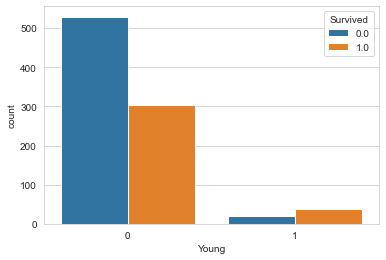

In [546]:
sns.countplot(data=df,x='Young',hue='Survived')

In [547]:
df[['Survived','Young','Age']].corr()

,Survived,Young,Age
Survived,1.000000,0.147223,-0.065795
Young,0.147223,1.000000,-0.485984
Age,-0.065795,-0.485984,1.000000


While not the best correlation it seems that **Young** correlates better with survival than **Age** so let's keep **Young**.

Notice we no longer have any missing data.

In [548]:
df.isna().sum()

Survived        418
Pclass            0
Age               0
SibSp             0
Parch             0
LogFare           0
Sex_male          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
NoFam             0
CabinUnknown      0
Young             0
dtype: int64

For the features which we one-hot encoded, such as **Embarked** and **Title**, we do not need to keep all the resulting features. Indeed, if there are n such features then knowing any n-1 of them uniquely determines the last feature. As a result we drop **Embarked_Q** and **Title_Master**.

In [549]:
df.drop(['Embarked_Q','Title_Master'],axis=1,inplace=True)

Our original train and test datasets are missing a lot of the features that we engineered. Let's redefine them now that all the feature engineering is done.

In [550]:
train=df[df['Survived'].isna()==False]
test=df[df['Survived'].isna()].drop('Survived',axis=1)

## Predictions

Before we make any predictions we should scale our data.

In [551]:
from sklearn.preprocessing import MinMaxScaler

In [552]:
scaler=MinMaxScaler()
train_s=train.copy()
train_s[train_s.columns.drop('Survived')]=scaler.fit_transform(train_s.drop('Survived',axis=1))
test_s=test.copy()
test_s[test_s.columns]=scaler.transform(test[test_s.columns])

There is a wide variety of machine learning algorithms that we could use to make our predictions. In all cases we will need to split the training data to create validation data. It will also be helpful to use some metrics to determine how well our predictions are performing. Let's import the relevant modules.

In [553]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix

### Logistic Regression

The first model we will employ is a basic logistic regression.

In [554]:
from sklearn.linear_model import LogisticRegressionCV

In [555]:
# initialize variables
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=101)
i=1

# iterate through the k-fold split
for trainer,tester in kf.split(train_s.drop('Survived',axis=1),train_s['Survived']):
    
    # define the training and test variables
    X_train=train_s.iloc[trainer].drop(['Survived'],axis=1)
    X_test=train_s.iloc[tester].drop(['Survived'],axis=1)
    y_train=train_s.iloc[trainer]['Survived']
    y_test=train_s.iloc[tester]['Survived']
    
    # fit the logistic regression
    logm=LogisticRegressionCV(cv=5,max_iter=10000,random_state=101)
    logm.fit(X_train,y_train)
    
    # make predictions
    logm_pred=logm.predict(X_test)
   
    # print current metrics
    print('Fold',i)
    print(classification_report(y_test,logm_pred))
    print(confusion_matrix(y_test,logm_pred))
    print('\n')
    i=i+1

Fold 1
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       110
         1.0       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

[[97 13]
 [20 49]]


Fold 2
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.91       110
         1.0       0.93      0.74      0.82        68

    accuracy                           0.88       178
   macro avg       0.89      0.85      0.86       178
weighted avg       0.88      0.88      0.87       178

[[106   4]
 [ 18  50]]


Fold 3
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88       110
         1.0       0.79      0.82      0.81        68

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighte

A basic logistic regression did not turn out all too badly. Let's try a KNeighboursClassifier next.

### K-Neighbours Classifier

In [228]:
from sklearn.neighbors import KNeighborsClassifier

We use the elbow method to determine an optimal number of neighbours.

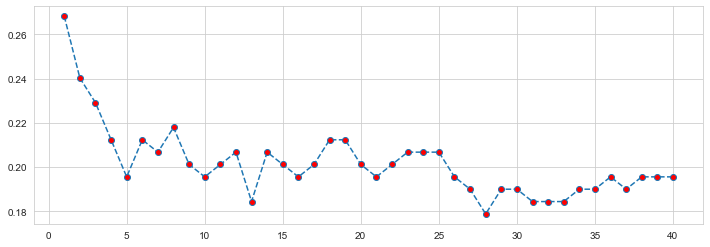

In [559]:
# initialize the variables
X_train,X_test,y_train,y_test=train_test_split(train_s.drop(['Survived'],axis=1),train_s['Survived'],test_size=0.2,random_state=101)
error=[]

# fit the classifier using various values for k
for i in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_pred=knn.predict(X_test)
    error.append(np.mean([knn_pred!=y_test]))
    
# plot the result    
plt.figure(figsize=(12,4))
plt.plot(range(1,41),error,marker='o',ls='--',markerfacecolor='red')

We'll go with 21 neighbours.

In [560]:
# initialize variables
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=101)
pred=[]
y_true=[]
i=1

# iterate through the k-fold split
for trainer,tester in kf.split(train_s.drop('Survived',axis=1),train_s['Survived']):
    
    # define the training and test variables
    X_train=train_s.iloc[trainer].drop(['Survived'],axis=1)
    X_test=train_s.iloc[tester].drop(['Survived'],axis=1)
    y_train=train_s.iloc[trainer]['Survived']
    y_test=train_s.iloc[tester]['Survived']
    
    # perform the K-nearest neighbours algorithm
    knn=KNeighborsClassifier(n_neighbors=21)
    knn.fit(X_train,y_train)
    
    # make predictions
    knn_pred=knn.predict(X_test)
    
    # print current metrics
    print('Fold',i)
    print(classification_report(y_test,knn_pred))
    print(confusion_matrix(y_test,knn_pred))
    print('\n')
    i=i+1

Fold 1
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85       110
         1.0       0.83      0.58      0.68        69

    accuracy                           0.79       179
   macro avg       0.81      0.75      0.77       179
weighted avg       0.80      0.79      0.78       179

[[102   8]
 [ 29  40]]


Fold 2
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89       110
         1.0       0.94      0.65      0.77        68

    accuracy                           0.85       178
   macro avg       0.88      0.81      0.83       178
weighted avg       0.86      0.85      0.84       178

[[107   3]
 [ 24  44]]


Fold 3
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       110
         1.0       0.83      0.72      0.77        68

    accuracy                           0.84       178
   macro avg       0.84      0.81      0.82       178
wei

The K-nearest neighbours approach seems to work roughly as well as a logistic regression. Let's try a random forest classifier next.

### Random Forest Classifier

In [273]:
from sklearn.ensemble import RandomForestClassifier

In [561]:
# initialize variables
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=101)
i=1

# iterate through the k-fold split
for trainer,tester in kf.split(train_s.drop('Survived',axis=1),train_s['Survived']):
    
    # define the training and test variables
    X_train=train_s.iloc[trainer].drop(['Survived'],axis=1)
    X_test=train_s.iloc[tester].drop(['Survived'],axis=1)
    y_train=train_s.iloc[trainer]['Survived']
    y_test=train_s.iloc[tester]['Survived']
    
    # fit the random forest classifier
    rfc=RandomForestClassifier(n_estimators=1000,verbose=1,random_state=101)
    rfc.fit(X_train,y_train)
    
    # make predictions
    rfc_pred=rfc.predict(X_test)
    
    # print current metrics
    print('Fold',i)
    print(classification_report(y_test,rfc_pred))
    print(confusion_matrix(y_test,rfc_pred))
    print('\n')
    i=i+1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Fold 1
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85       110
         1.0       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

[[96 14]
 [21 48]]




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Fold 2
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       110
         1.0       0.84      0.71      0.77        68

    accuracy                           0.84       178
   macro avg       0.84      0.81      0.82       178
weighted avg       0.84      0.84      0.83       178

[[101   9]
 [ 20  48]]




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Fold 3
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       110
         1.0       0.81      0.76      0.79        68

    accuracy                           0.84       178
   macro avg       0.84      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178

[[98 12]
 [16 52]]




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Fold 4
              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79       110
         1.0       0.66      0.72      0.69        68

    accuracy                           0.75       178
   macro avg       0.74      0.75      0.74       178
weighted avg       0.76      0.75      0.75       178

[[85 25]
 [19 49]]




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fold 5
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       109
         1.0       0.72      0.72      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178

[[90 19]
 [19 50]]




[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


The random forest classifier performs decently. Next up is a support vector machine.

### Support Vector Machine

In [278]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [564]:
# initialize variables
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=101)
i=1

# iterate through the k-fold split
for trainer,tester in kf.split(train_s.drop('Survived',axis=1),train_s['Survived']):
    
    # define the training and test variables
    X_train=train_s.iloc[trainer].drop(['Survived'],axis=1)
    X_test=train_s.iloc[tester].drop(['Survived'],axis=1)
    y_train=train_s.iloc[trainer]['Survived']
    y_test=train_s.iloc[tester]['Survived']
    
    # conduct a grid search
    param_grid = {'C': [1e1,3e1,1e2,3e2,1e3,3e3,1e4], 'gamma': [1e-3,3e-3,1e-2,3e-2,1e-1]}
    svc=GridSearchCV(estimator=SVC(random_state=101),param_grid=param_grid,verbose=1)
    
    # fit the model
    svc.fit(X_train,y_train)
    
    # record values for later analysis
    svc_pred=svc.predict(X_test)

    # print current metrics
    print('Fold',i)
    print('Best Parameters:',svc.best_params_)
    print(classification_report(y_test,svc_pred))
    print(confusion_matrix(y_test,svc_pred))
    print('\n')
    i=i+1

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fold 1
Best Parameters: {'C': 3000.0, 'gamma': 0.003}
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       110
         1.0       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

[[98 12]
 [23 46]]


Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fold 2
Best Parameters: {'C': 30.0, 'gamma': 0.03}
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.91       110
         1.0       0.93      0.74      0.82        68

    accuracy                           0.88       178
   macro avg       0.89      0.85      0.86       178
weighted avg       0.88      0.88      0.87       178

[[106   4]
 [ 18  50]]


Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fold 3
Best Parameters: {'C': 30.0, 'gamma': 0.03}
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89       110
         1.0       0.83      0.84      0.83        68

    accuracy                           0.87       178
   macro avg       0.86      0.86      0.86       178
weighted avg       0.87      0.87      0.87       178

[[98 12]
 [11 57]]


Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fold 4
Best Parameters: {'C': 30.0, 'gamma': 0.1}
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       110
         1.0       0.75      0.72      0.74        68

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

[[94 16]
 [19 49]]


Fitting 5 folds for each of 35 candidates, totalling 175 fits
Fold 5
Best Parameters: {'C': 30.0, 'gamma': 0.03}
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       109
         1.0       0.79      0.70      0.74        69

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178

[[96 13]
 [21 48]]




[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    5.6s finished


The support vector classifier with a grid search makes pretty decent predictions! Let's try a neural network next.

### Neural Network

In [297]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [415]:
len(train_s.columns)

15

In [565]:
# initialize variables
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=101)
i=1
stop=EarlyStopping(mode='min',patience=20,restore_best_weights=True)

# iterate through the k-fold split
for trainer,tester in kf.split(train_s.drop('Survived',axis=1),train_s['Survived']):
    
    # create the model
    model=Sequential()
    model.add(Dense(units=15,activation='relu'))
#     model.add(Dropout(0.2))
    model.add(Dense(units=8,activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(units=4,activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    # define the training and test variables
    X_train=train_s.iloc[trainer].drop(['Survived'],axis=1)
    X_test=train_s.iloc[tester].drop(['Survived'],axis=1)
    y_train=train_s.iloc[trainer]['Survived']
    y_test=train_s.iloc[tester]['Survived']

    # fit the model
    model.fit(x=X_train,y=y_train,epochs=1000,verbose=0,callbacks=[stop],validation_data=(X_test,y_test))
    
    # make predictions
    ann_pred=model.predict(X_test)>0.5
    
    # print current metrics
    print('Fold',i)
    print(classification_report(y_test,ann_pred))
    print(confusion_matrix(y_test,ann_pred))
    print('\n')
    i=i+1

Fold 1
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86       110
         1.0       0.85      0.65      0.74        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179

[[102   8]
 [ 24  45]]


Fold 2
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90       110
         1.0       0.92      0.72      0.81        68

    accuracy                           0.87       178
   macro avg       0.89      0.84      0.86       178
weighted avg       0.88      0.87      0.87       178

[[106   4]
 [ 19  49]]


Fold 3
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88       110
         1.0       0.82      0.75      0.78        68

    accuracy                           0.84       178
   macro avg       0.84      0.82      0.83       178
wei

The neural network also performs quite well. For our final algorithm we will use an ensemble voting method.

### Ensemble Voting

We average our findings from the five previous methods.

In [566]:
# initialize variables
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=101)
i=1
stop=EarlyStopping(mode='min',patience=20,restore_best_weights=True)

# iterate through the k-fold split
for trainer,tester in kf.split(train_s.drop('Survived',axis=1),train_s['Survived']):
    
    # define the training and test variables
    X_train=train_s.iloc[trainer].drop(['Survived'],axis=1)
    X_test=train_s.iloc[tester].drop(['Survived'],axis=1)
    y_train=train_s.iloc[trainer]['Survived']
    y_test=train_s.iloc[tester]['Survived']
    
    # fit the various models (excluding the neural network)
    logm=LogisticRegressionCV(cv=5,max_iter=10000,random_state=101)
    logm.fit(X_train,y_train)
    knn=KNeighborsClassifier(n_neighbors=21)
    knn.fit(X_train,y_train)
    rfc=RandomForestClassifier(n_estimators=1000,verbose=1,random_state=101)
    rfc.fit(X_train,y_train)
    param_grid = {'C': [1e1,3e1,1e2,3e2,1e3,3e3,1e4], 'gamma': [1e-3,3e-3,1e-2,3e-2,1e-1], 'kernel': ['rbf']}
    gs=GridSearchCV(estimator=SVC(random_state=101),param_grid=param_grid,verbose=1)
    gs.fit(X_train,y_train)
    
    # create and fit the neural network
    model=Sequential()
    model.add(Dense(units=15,activation='relu'))
#     model.add(Dropout(0.2))
    model.add(Dense(units=8,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=4,activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(x=X_train,y=y_train,epochs=1000,verbose=0,callbacks=[stop],validation_data=(X_test,y_test))
    
    # make predictions
    logm_pred=logm.predict(X_test)
    knn_pred=knn.predict(X_test)
    rfc_pred=rfc.predict(X_test)
    gs_pred=gs.predict(X_test)
    ann_pred=1*((model.predict(X_test)>0.5).reshape(len(X_test)))
    
    # average the predictions
    vote_pred=((logm_pred+knn_pred+rfc_pred+gs_pred+ann_pred)/5)>0.5
   
    # print current metrics
    print('Fold',i)
    print(classification_report(y_test,vote_pred))
    print(confusion_matrix(y_test,vote_pred))
    print('\n')
    i=i+1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Fold 1
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       110
         1.0       0.82      0.68      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

[[100  10]
 [ 22  47]]




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Fold 2
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       110
         1.0       0.94      0.74      0.83        68

    accuracy                           0.88       178
   macro avg       0.90      0.85      0.87       178
weighted avg       0.89      0.88      0.88       178

[[107   3]
 [ 18  50]]




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Fold 3
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       110
         1.0       0.82      0.82      0.82        68

    accuracy                           0.87       178
   macro avg       0.86      0.86      0.86       178
weighted avg       0.87      0.87      0.87       178

[[98 12]
 [12 56]]




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Fold 4
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       110
         1.0       0.77      0.74      0.75        68

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

[[95 15]
 [18 50]]




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Fold 5
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       109
         1.0       0.75      0.72      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178

[[92 17]
 [19 50]]




The ensemble classifier seems to work best so we will use that for our Kaggle submission.

In [567]:
# create the early stopping callback
stop=EarlyStopping(mode='min',patience=20,restore_best_weights=True)

# define the train and test sets
X_train=train_s.drop('Survived',axis=1)
X_test=test_s
y_train=train_s['Survived']

# fit the various models (excluding the neural network)
logm=LogisticRegressionCV(cv=5,max_iter=10000,random_state=101)
logm.fit(X_train,y_train)
knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
rfc=RandomForestClassifier(n_estimators=1000,verbose=1,random_state=101)
rfc.fit(X_train,y_train)
param_grid = {'C': [1e1,3e1,1e2,3e2,1e3,3e3,1e4], 'gamma': [1e-3,3e-3,1e-2,3e-2,1e-1], 'kernel': ['rbf']}
gs=GridSearchCV(estimator=SVC(random_state=101),param_grid=param_grid,verbose=1)
gs.fit(X_train,y_train)
    
# create validation data for the neural network
X_train_ann,X_test_ann,y_train_ann,y_test_ann=train_test_split(X_train,y_train,test_size=0.2,random_state=101)
    
# create and fit the neural network using validation data
model=Sequential()
model.add(Dense(units=15,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(units=8,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(units=4,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x=X_train_ann,y=y_train_ann,epochs=1000,verbose=0,callbacks=[stop],validation_data=(X_test_ann,y_test_ann))
    
# make predictions
logm_pred=logm.predict(X_test)
knn_pred=knn.predict(X_test)
rfc_pred=rfc.predict(X_test)
gs_pred=gs.predict(X_test)
ann_pred=1*((model.predict(X_test)>0.5).reshape(len(X_test)))
    
# average the predictions
pred=1*(((curr_logm_pred+curr_knn_pred+curr_rfc_pred+curr_gs_pred+curr_ann_pred)/5)>0.5)

# create a dataframe containing our predictions
orig_test=pd.read_csv('test.csv')
submission=pd.DataFrame(data={'PassengerId':orig_test['PassengerId'],'Survived':pred})

# create a csv file from the dataframe
submission.to_csv(path_or_buf='submission.csv',index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


The above submission yields a score of 0.78708, i.e. our predictions had an accuracy of 78.708%. This is not bad at all, putting our submission in the top 13% of Kaggle's leaderboard. Note that this accuracy is substantially lower than the accuracy on our validation data, suggesting some overfitting going on.

# Conclusion

As far as first forays into machine learning go I would say our results are rather good! There is certainly room for improvement, e.g. better feature engineering (perhaps the ticket data contains more useful information than we thought) as well as fine-tuning of our models. However, as this was meant to be more of a learning experience for me I think I will leave this project where it is (for now at least).